# Feedforward: Building a ReLU neural network

## 1. 

![problem1.1](1-1.JPG)

## 2

![problem1.2](1-2.jpg)

## 3

In [192]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
def ff_nn_ReLu(x):
    return max(0, x)

## 4

![sample1](IMG_8490.jpg)

![sample23](IMG_2482.jpg)

# 2 Gradient Descent

## 1

partial derivative of x: -3x^2 + 200x - 200y,  partial derivative of y: 400y(y^2-x)

## 2


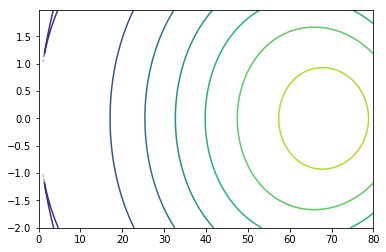

In [44]:
import numpy as np
import matplotlib.pyplot as plt
delta = 0.025
X, Y = np.meshgrid(np.arange(0,80,delta), np.arange(-2,2, delta))
rosenbrockfunction = lambda x,y: (1-x)**3 + 100*(y**2-x)**2
Z = rosenbrockfunction(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)


## 3

In [45]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 200*x - 200*y**2
    df_dy = 400*y*(y**2 - x)
    return np.array([df_dx, df_dy])

In [51]:
def grad_descent(learning_rate, starting_point=None, iterations):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(0,80)
        y = np.random.uniform(-2,2)
        point = np.array([x,y])
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

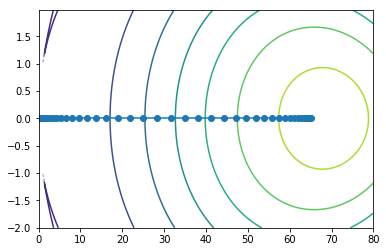

In [74]:
#learning rate = 0.001
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.001, starting_point=[65,0])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

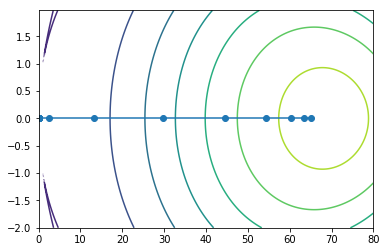

In [75]:
#learning rate = 0.005
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.005, starting_point=[65,0])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

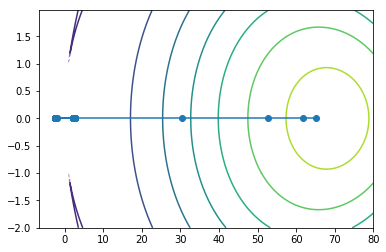

In [77]:
#learning rate = 0.01
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.01, starting_point=[65,0])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 4

In [80]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(0,80)
        y = np.random.uniform(-2,2)
        point = np.array([x,y])
    trajectory = [point]
    v = np.zeros(len(point))
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

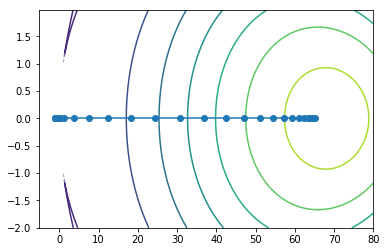

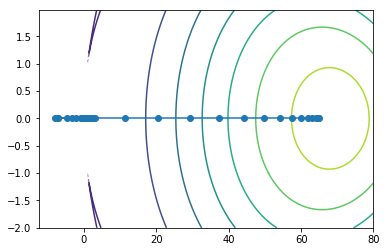

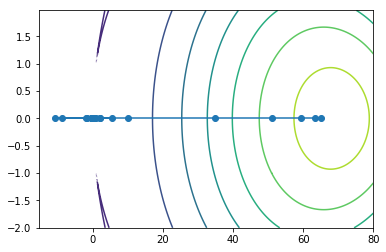

In [92]:
#epsilon=0.001, alpha=0.5
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.001, alpha=0.5, starting_point=[65,0])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#epsilon=0.001, alpha=0.7
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.001, alpha=0.7, starting_point=[65,0])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#epsilon=0.005, alpha=0.5
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.005, alpha=0.5, starting_point=[65,0])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 3 Backprop

![3.1](IMG_6284.JPG)

## 2

![](IMG_6284.heic)

/Users/xinyuzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/xinyuzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


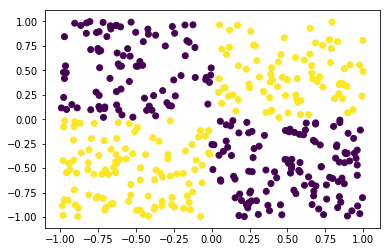

In [221]:
x1 = np.random.uniform(-1,1,size=400).astype("float128")
x2 = np.random.uniform(-1,1,size=400).astype("float128")
data = pd.DataFrame({'x1':x1,'x2':x2})
data['y'] = 0
data['y'][(data['x1'] > 0) & (data['x2'] > 0)] = 1
data['y'][(data['x1'] <= 0) & (data['x2'] <= 0)] = 1
plt.scatter(data['x1'],data['x2'],c = data['y'])

## 3, 4

In [222]:
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))

In [223]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [224]:
def y_hat_fun(x,point):
    W,V,b,by = point
    h_in = np.dot(x,W) + b
    h_out = []
    for h in h_in:
        one_sample = []
        for i in h:
            one_sample.append(ff_nn_ReLu(i))
        h_out.append(one_sample)

    h_out = np.array(h_out)
    
    y_in = np.dot(h_out,V) + by
    y_hat = list(map(sigmoid, y_in))
    return y_hat


In [225]:
def loss(y, y_hat):
    I = np.array([1] * len(y))
    return sum(-y * np.array(list(map(math.log,y_hat))) - (I-y) * np.array(list(map(math.log,I - y_hat))))


In [226]:
def dL_dyhat(y,y_hat):
    I = np.array([1] * len(y))
    return y/y_hat - ((I-y)/(I-y_hat))

In [227]:
def Relu_derivative(x):
    if x > 0:
        return 1
    else:
        return 0

In [228]:
def grad_f(point,vector_x):
    W,V,b,by = point
    yhat = y_hat_fun(vector_x,point)
    
    x1,x2 = vector_x[:,0], vector_x[:,1]
    v1,v2,v3 = V
    h_in = np.dot(x,W) + b
    h = []
    for hs in h_in:
        one_sample = []
        for i in hs:
            one_sample.append(ff_nn_ReLu(i))
        h.append(one_sample)

    h = np.array(h)
    
    inh1,inh2,inh3 = h_in[:,0], h_in[:,1], h_in[:,2]
    h1, h2, h3 = h[:,0], h[:,1], h[:,2]
    
    I = np.array([1] * len(y))
    dL_dv1 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*h1)
    dL_dv2 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*h2)
    dL_dv3 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*h3)
    dL_dby = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat))
    
    dL_dw11 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v1*np.array(list(map(Relu_derivative, inh1)))*x1)
    dL_dw12 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v2*np.array(list(map(Relu_derivative, inh2)))*x1)
    dL_dw13 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v3*np.array(list(map(Relu_derivative, inh3)))*x1)
    dL_dw21 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v1*np.array(list(map(Relu_derivative, inh1)))*x2)
    dL_dw22 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v2*np.array(list(map(Relu_derivative, inh2)))*x2)
    dL_dw23 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v3*np.array(list(map(Relu_derivative, inh3)))*x2)
    dL_db1 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v1*np.array(list(map(Relu_derivative, inh1))))
    dL_db2 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v2*np.array(list(map(Relu_derivative, inh2))))
    dL_db3 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v3*np.array(list(map(Relu_derivative, inh3))))
    
    dL_dw = np.array([[dL_dw11,dL_dw12,dL_dw13],[dL_dw21,dL_dw22,dL_dw23]])
    dL_dv = np.array([dL_dv1,dL_dv2,dL_dv3])
    dL_db = np.array([dL_db1,dL_db2,dL_db3])

    return np.array([dL_dw, dL_dv, dL_db, dL_dby])

In [229]:
def grad_descent(vector_x,y,starting_point=None, iterations=10, learning_rate=1e-2):
    x1, x2 = vector_x[:,0], vector_x[:,1]
    if len(starting_point)>0:
        point = starting_point
    else:
        starting_w = np.random.uniform(-.1,.1,size=6).astype("float128")
        starting_v = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_b = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_by = np.random.uniform(-.1,.1,size=1).astype("float128")
        point = np.array([starting_w,starting_v,starting_b,starting_by])
        
    trajectory = [point] 
    losses = [loss(y, y_hat_fun(vector_x, point))]
    
    for i in range(iterations):
        grad = grad_f(point, vector_x)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, y_hat_fun(vector_x,point)))
    return (np.array(trajectory), losses)

Text(0.5, 0, 'Iteration')

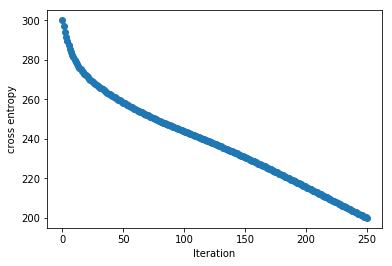

In [230]:
x = np.array(data.loc[:,['x1','x2']])
y = np.array(data['y'])
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1,0,-1])
by = [1]
b = np.array([0,0,1])

point = np.array([W,V,b,by])
traj, losses = grad_descent(x, y, starting_point = point, iterations=250,learning_rate=1e-1)
plt.plot(losses,'o')
plt.ylabel("cross entropy")
plt.xlabel("Iteration")


## 5

Text(0.5, 0, 'Iteration')

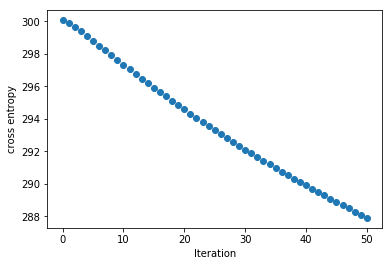

In [231]:
def grad_descent_momentum(vector_x,y,iterations=50, epsilon=0.005, alpha=0.5, starting_point=point):
    x1, x2 = vector_x[:,0], vector_x[:,1]
    if len(starting_point)>0:
        point = starting_point
    else:
        starting_w = np.random.uniform(-.1,.1,size=6).astype("float128")
        starting_v = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_b = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_by = np.random.uniform(-.1,.1,size=1).astype("float128")
        point = np.array([starting_w,starting_v,starting_b,starting_by])
        
    trajectory = [point] 
    losses = [loss(y, y_hat_fun(vector_x, point))]
    v = 0.0 * grad_f(point, vector_x)
    
    for i in range(iterations):
        grad = grad_f(point, vector_x)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, y_hat_fun(vector_x,point)))
    return (np.array(trajectory), losses)


x = np.array(data.loc[:,['x1','x2']])
y = np.array(data['y'])
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1,0,-1])
by = [1]
b = np.array([0,0,1])

point = np.array([W,V,b,by])
traj, losses = grad_descent_momentum(x,y,iterations=50, epsilon=0.005, alpha=0.5, starting_point=point)
plt.plot(losses,'o')
plt.ylabel("cross entropy")
plt.xlabel("Iteration")


## 6

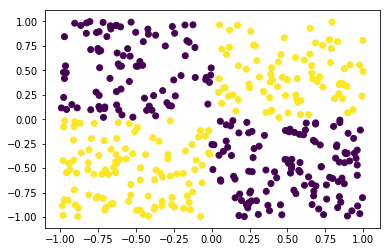

In [232]:
plt.scatter(data['x1'],data['x2'],c = data['y'])

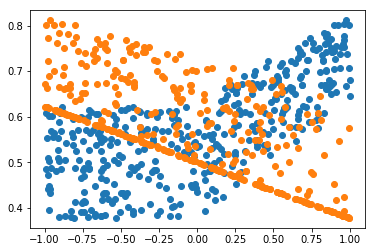

In [233]:
plt.plot(x, y_hat_fun(x,traj[0]),'o')